# Deep Learning on Credit Card Fraud Detection

## Overview
This final year project focuses on building machine learning and deep learning models to detect fraudulent transactions using credit card data. Even till today, when financial security have improved significantly, fradulent transactions still exist which can hurt the financial instituitions and consumers. Credit card fraud poses a significant challenge to financial security as it lead to huge financial losses and undermining consumer's trust to the financial company. By applying machine learning and deep learning techniques with TensorFlow, I aim to identify patterns indicative of fraud, and therefore mitigating the risks and strengthen transaction security.

## Objectives
- To develop a machine learning model capable of distinguishing between fradulent and legitimate credit card transactions with high accuracy, as accuracy should be the main metrics of measure when it comes to detecting fradulent transactions. This involes starting with traditional machine learning algorithms to more complex deep learning architectures.
-  To evaluate the model's performance using appropriate metrics such as accuracy, precision, recall and F1 score. This approach ensures that the models are able to identify fradulent transactions accurately and maintain a balance between sensitivity and reducing the occurrences of false positives and false negatives. Main measurement metrics used will be accuracy.
-  To compare traditional machine learning and deep learning techniques in terms of their effectiveness in credit card fraud detection. This includes an analysis of early methods such as logistic regression and Naive Bayes, with more sophisticated techniques like Support Vector Machines(SVM) and Random Forest, as well as the exploration of deep learning model such as Convolutional Neural Network(CNN).

## Dataset description
As quoted from the sources, "This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. " I have searched for credit card fraud dataset through Google Dataset Search, datasetsearch.research.google.com , and this dataset sourced origin from https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023 .

I have chosen this dataset as the csv file has a large number of records, which can be suitable for utilizing Deep Learning  techniques as a dataset of this magnitude can provide a rich learning environment for the model, allowing it to better capture complex patterns and relationships of behaviours indicatives of fradulent transactions.

# Data preparation:

These are all the preprocessing steps I took to preprocess the data to ensure it is in the optimal condition for analysis as often in real-world datasets are imperfect such as they might contain missing values or duplicate records. The steps I took ensured that they are in the right data types as well as giving a general understanding on what the dataset contains. Since the binary value of the column: "Class" indicate whether the transactions is fradulent(1) or not(0) and from the results, it is shown that the dataset is balanced with equal number of fradulent and legitimate transactions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [3]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
#Display data types of each columns
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
#Display column names
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# check for duplicate rows
df.duplicated().sum()

0

In [7]:
# if duplicate rows are found, drop them with:
#df.drop_duplicates()

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [10]:
print(df['Class'].value_counts())

0    284315
1    284315
Name: Class, dtype: int64


# Exploratory Data Analysis of dataset

This section of the analysis shows the relationship between different features within the dataset and identifying any potential outliers in the variables. It is also to get a visual sense of the distribution of various variables within the dataset. Through understanding these aspects of the data is essential before proceeding into building and implementing the machine learning and deep learning models.

### Correlation Matrix

The correlation matrix visualizes the correlation coefficients between all numerical features or variables in the dataset. This helps to identify features that have strong correlation with each other, which could be used for feature engineering.

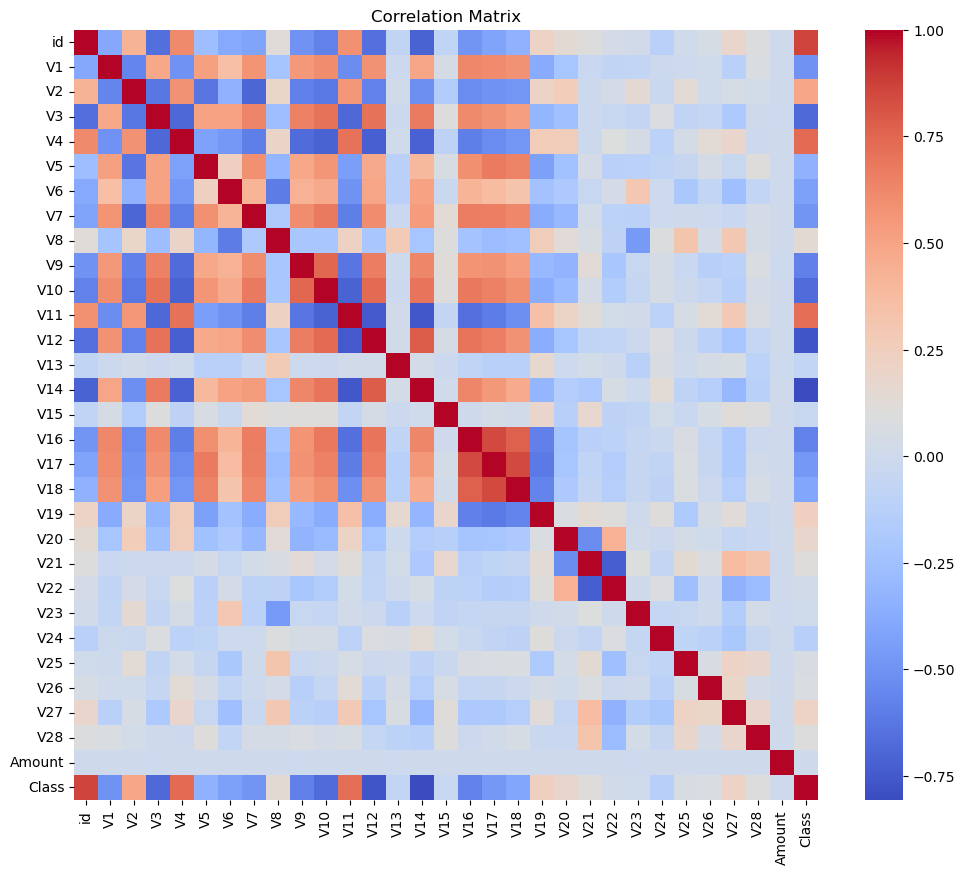

In [12]:
import seaborn as sns

corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Distribution histogram

Using historgram to visualize the distribution of the selected features and to understand and identify any underlying patterns such as skewness or outliers.

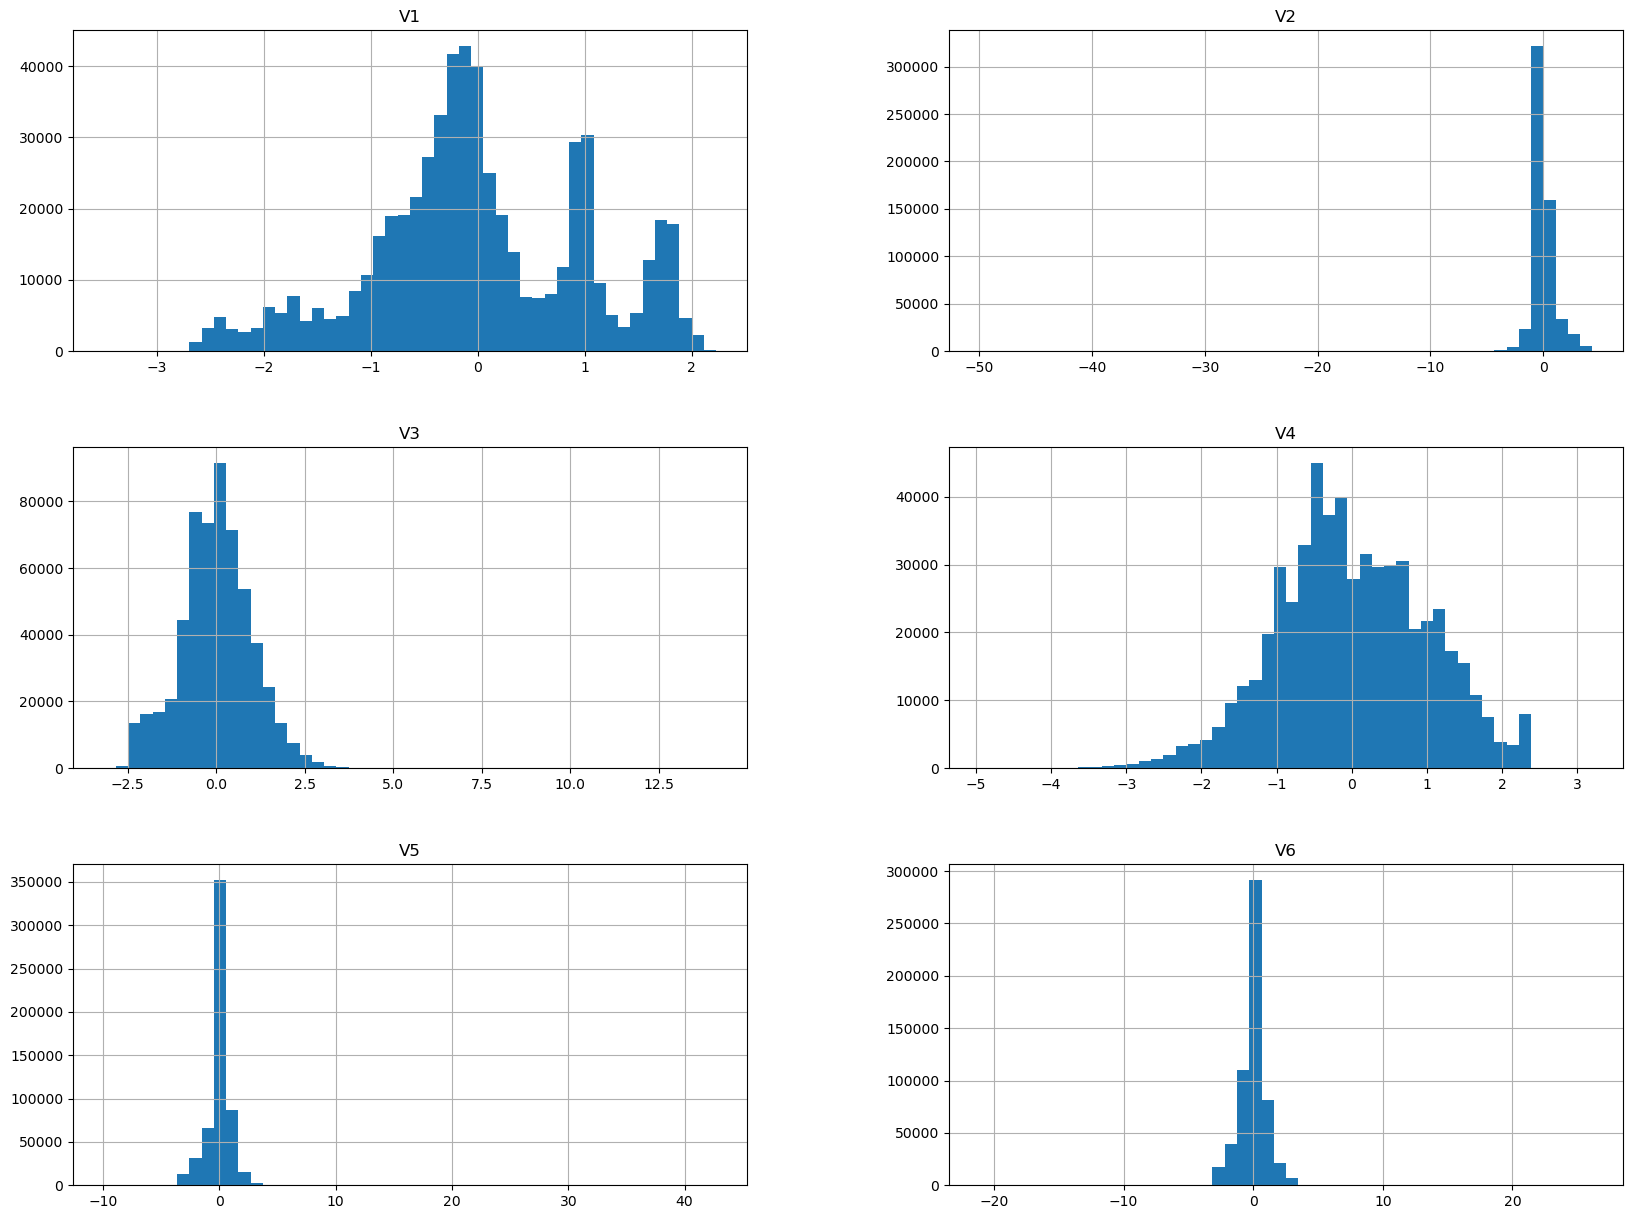

In [14]:
# Plotting distributions of a V1 to V6, first few example
df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6']].hist(bins=50, figsize=(20, 15))
plt.show()

### Box plots

Box plots are used for visualizing the distribution of numberical data and spotting any outliers.

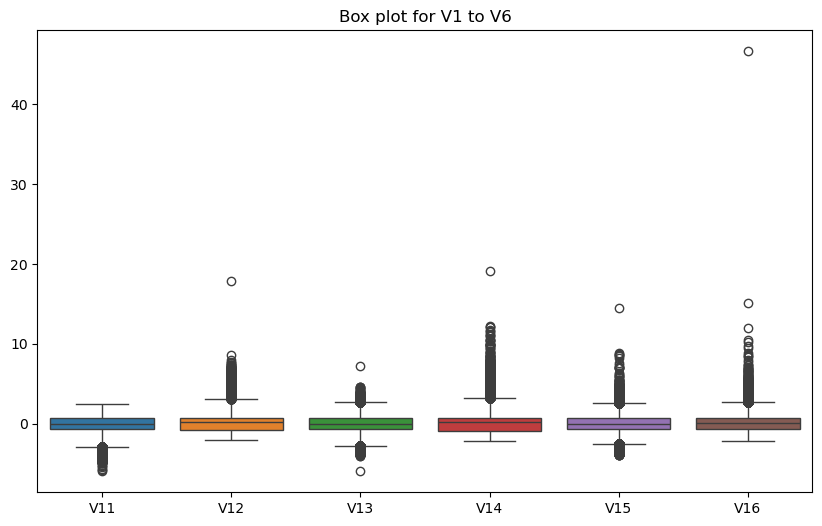

In [16]:
# Box plots for outlier detection from V11 to V16
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['V11', 'V12', 'V13', 'V14', 'V15', 'V16']])
plt.title('Box plot for V1 to V6')
plt.show()

# Traditional machine learning models

In this section, I first explore and implement the different traditional machine learning models for credit card fraud detection. These models though less complex than the deep learning models, they play an important part for comparison and analysis purposes as they are still efficient and effective in general. 

#### Models to be implemented:
Naive Bayes, Logistic Regression, Support Vector Machine(SVM), Random Forest, AdaBoost, LightGBM.

#### Evaluation approach:
Each model will be trained using training dataset, and then they will be evaluated on a seperate test set using metrics such as accuracy, precision, recall and F1-score to assess each model's performance, with the main measurement metrics being accuracy. The results will then be used to compare the models directly to find the best performing model in credit card fraud detection. 

In [18]:
# Data pre-processing again before training machine learning models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'id' column as it's not a feature for model training
df = df.drop(columns=['id'])

# Separating features and target variable
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Standardize the features so they have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Naive Bayes model

#### Overview
The Naive Bayes model is a supervised learning algorithm used for classification tasks. It is based on Bayes' theorem and assumes independence between features.

#### How it Works
The model calculates the probability of each feature given a class using Bayes' theorem : 

P(feature|class) = P(class|feature) * P(feature) / P(class).

And the class with the highest probability is predicted for a new instance:

P(class|features) = P(features|class) * P(class) / P(features).

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict the test set results
nb_pred = nb_model.predict(X_test)

# Evaluate the model on the test set
print("Naive Bayes Model:")
print(classification_report(y_test, nb_pred))

nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes model's accuracy:", nb_acc)

Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85149
           1       0.98      0.86      0.91     85440

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589

Naive Bayes model's accuracy: 0.9186524336270216


### Naive Bayes model's confusion matrix

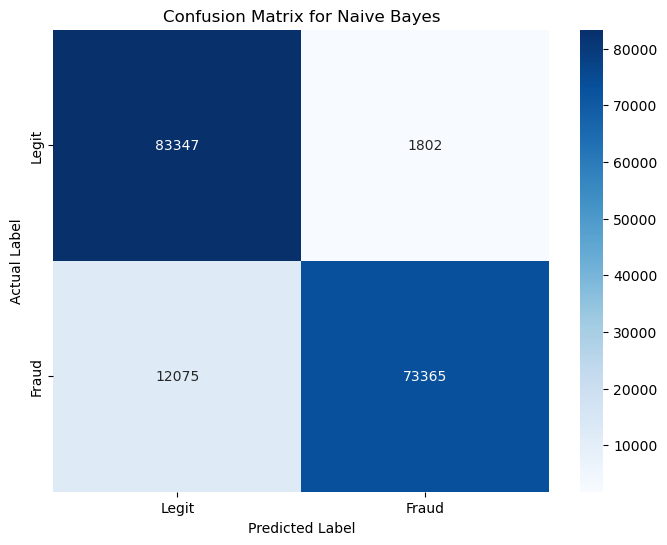

In [28]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for Naive Bayes')
plt.show()

# Logistic Regression Model

#### Overview
Logistic Regression is a supervised learning algorithm used for binary classification tasks. It predicts the probability of an instance belonging to one of two classes, which in this case, it predicts the probability that a given input belongs to a particular feature/category.

#### How It Works
Logistic Regression constructs a linear equation to establish a decision boundary between the classes. However, instead of producing a linear output, it applies the logistic function to the result of this linear equation, converting it into a probability score between 0 and 1.

The logistic function is expressed as:
Probability = 1 / (1 + Exp(-(Weighted Sum + Bias)))

Where:

Probability is the predicted probability of the positive class.

Weighted Sum is the sum of the product of each feature and its corresponding weight.

Exp is the exponential function.

Bias is the constant value added to the weighted sum.

This probability output helps in classifying the instances. If the probability is greater than or equal to 0.5, the instance is classified into one class, typically the "positive" or "fraud" class, and if it is less than 0.5 then it is classified into the other class, typically the "negative" or "non-fraud" class.

In [30]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict the test set results
logreg_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
print("Logistic Regression Model:")
print(classification_report(y_test, logreg_pred))

logreg_acc = accuracy_score(y_test, logreg_pred)
print("Logistic Regression model's accuracy:", logreg_acc)

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

Logistic Regression model's accuracy: 0.9655311889981183


### Logistic Regression model's confusion matrix

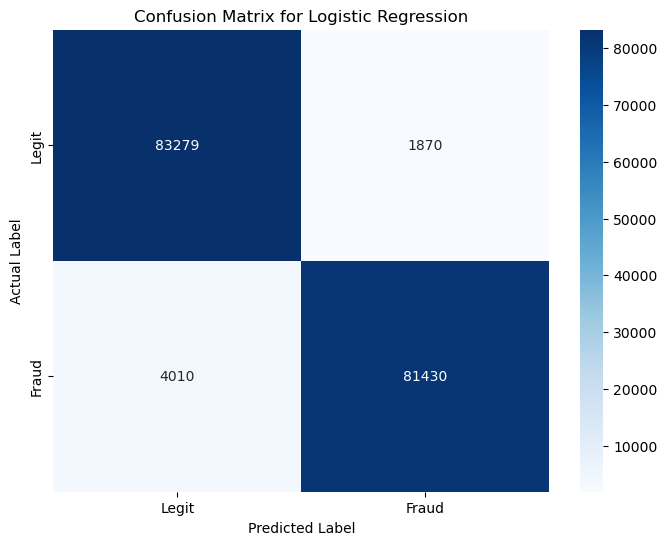

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

# Support Vector Machine Model with LinearSVC

#### Overview
`LinearSVC` also known as Linear Support Vector Classification, is a variant of the Support Vector Machine (SVM) algorithm, implemented using the `liblinear` library.

#### How It Works

`LinearSVC` tries to find the optimal hyperplane that separates the classes in the feature space. The objective is to minimize a specific form of the loss function, typically the squared hinge loss, while also adding a regularization term that penalizes the complexity of the model (magnitude of the coefficients). This helps to avoid overfitting.

The regularization parameter (`C`) in `LinearSVC` controls the trade-off between achieving a low error on the training data and minimizing the model complexity for better generalization.

Depending on the ratio of the number of features to the number of samples, `LinearSVC` allows you to choose between the primal or dual formulations of the optimization problem. The dual is selected here due to computational contraint.

In [34]:
from sklearn.svm import LinearSVC

# Define the LinearSVC model
linear_svm_model = LinearSVC(random_state=25, dual=False)  # dual=False if n_samples > n_features

# Train the model
linear_svm_model.fit(X_train, y_train)

# Predict the test set results
linear_svm_pred = linear_svm_model.predict(X_test)

# Evaluate the model on the test set
print("Linear SVM Model:")
print(classification_report(y_test, linear_svm_pred))

svm_acc = accuracy_score(y_test, linear_svm_pred)
print("Linear SVM model's accuracy:", svm_acc)

Linear SVM Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     85149
           1       0.98      0.95      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589

Linear SVM model's accuracy: 0.9637256798504007


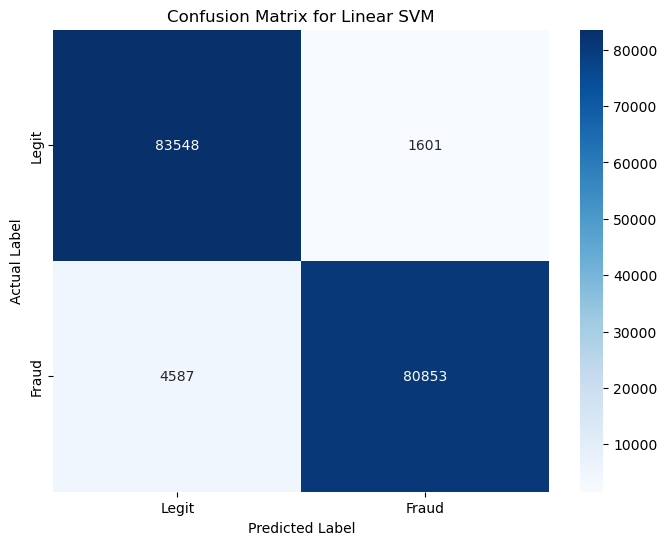

In [36]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, linear_svm_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for Linear SVM')
plt.show()

# Random Forest model

#### Overview
Random Forest is a supervised learning algorithm that combines multiple decision trees to predict outcomes. Random Forest is an ensemble learning method which works by constructing a multitude of decision trees at training time and for credit card fraud detection classification, the output of the Random Forest is the class selected by most trees.

#### How It Works

Each tree in Random Forest is built from a random sample of the training dataset, known as bootstrapping.

Each tree is then trained on the new dataset. While building each tree, it randomly select a subset of features to consider during each split. This adds diversity among the trees.

Each tree gives a prediction and they are combined so the class that gets the most votes becomes the model’s prediction..


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=40,    
    max_depth=10,       
    max_features='sqrt',
    n_jobs=-1,
    random_state=30
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the test set results
rf_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
print("Random Forest Model:")
print(classification_report(y_test, rf_pred))

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest model's accuracy:", rf_acc)

Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     85149
           1       1.00      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Random Forest model's accuracy: 0.9845886897748389


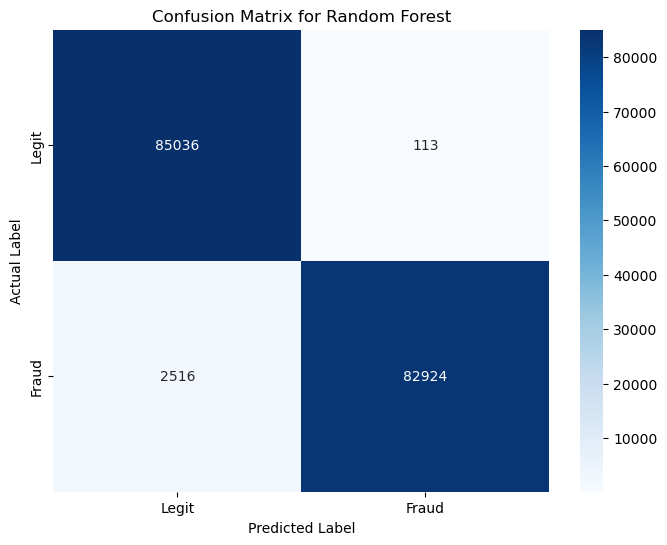

In [40]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

# AdaBoost with Decision Tree model

#### Overview
AdaBoost also known as Adaptive Boosting is an ensemble technique that aims to convert a series of weak models into a strong models. In this case, the weak model is a Decision Tree model.

#### How It Works
The algorithm achieves this by building a model from the training data.

Then it creating a second model that attempts to correct the errors from the first model. 

This process is repeated until the training set is predicted perfectly or a maximum number of models are added.

The predictions of all models are then combined to produce the final output.

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost model with a decision tree as the base estimator
ada_boost = AdaBoostClassifier(n_estimators=16, algorithm='SAMME', random_state=30) # Base estimator is Decision Tree with max_depth=1

# Train the model
ada_boost.fit(X_train, y_train)

# Predict the test set results
ada_pred = ada_boost.predict(X_test)

# Evaluate the model on the test set
print("AdaBoost Model:")
print(classification_report(y_test, ada_pred))

ada_acc = accuracy_score(y_test, ada_pred)
print("AdaBoost model's accuracy:", ada_acc)

AdaBoost Model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     85149
           1       0.97      0.94      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

AdaBoost model's accuracy: 0.9533029679522126


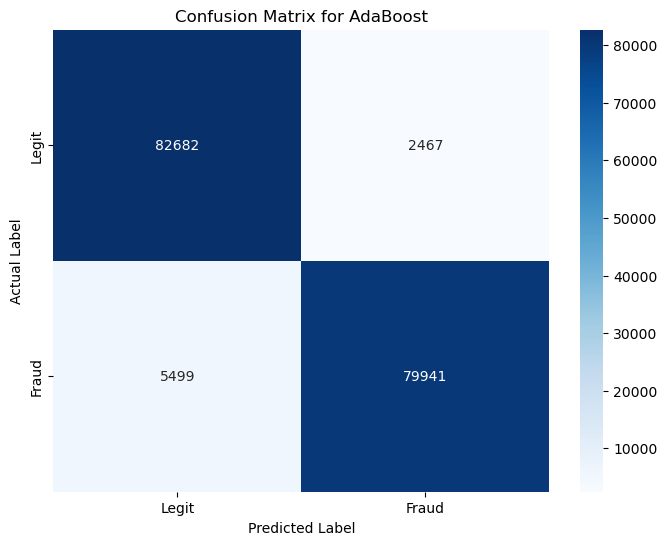

In [43]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, ada_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for AdaBoost')
plt.show()

# Light Gradient Boosting Machine(LightGBM) model

#### Overview
LightGBM is a gradient boosting framework that uses decision tree algorithms. It is designed for distributed and efficient training, particularly for large datasets, and is known for its high speed and lower memory usage.

#### How It Works
LightGBM builds trees leaf-wise, unlike other boosting algorithms that build trees level-wise. This approach can lead to faster training times.

LightGBM uses histogram-based optimizations for speed and memory efficiency. Instead of using all data points to find the best split, it buckets continuous feature values into discrete bins.

LightGBM trains the first decision tree and then compute the gradients of the loss function with the prediction of the first tree.

Then it trains the next decision tree on the gradients computed from the previous steps and it is repeated until the desired number of estimators is reached.

Then the predictions of all trees are combined to produce the final output.

In [46]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [48]:
import lightgbm as lgb

# Define the LGBM model
lgbm_model = lgb.LGBMClassifier( num_leaves=40, max_depth=-1, n_estimators=40)

# Train the model 
lgbm_model.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    eval_metric='logloss'
)

# Predict the test set results
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, lgbm_pred))

lgbm_acc = accuracy_score(y_test, lgbm_pred)
print("LightGBM model's accuracy:", lgbm_acc)

[LightGBM] [Info] Number of positive: 198875, number of negative: 199166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499634 -> initscore=-0.001462
[LightGBM] [Info] Start training from score -0.001462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

LightGBM model's accuracy: 0.9952810556366471


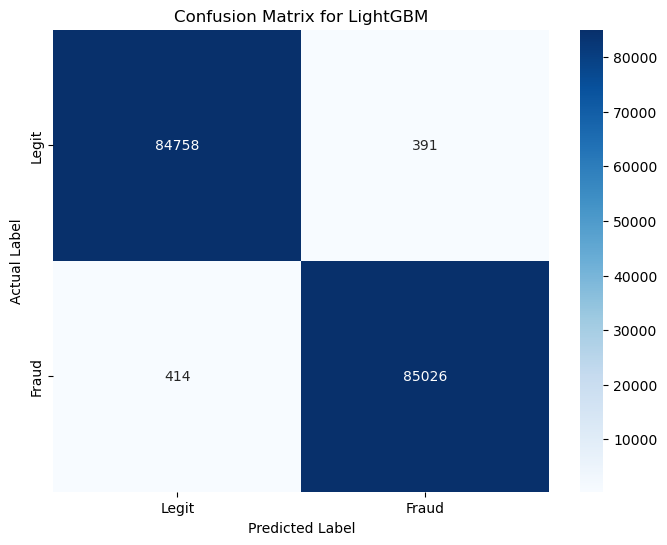

In [49]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, lgbm_pred)
    
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix for LightGBM')
plt.show()

# Building the deep neural network baseline model

#### Overview

After implementing machine learning models, the focus is shifted into developing and implementing deep learning techniques as part of the main objectives of this project, to evaluate and compare performance of the deep learning models with the machine learning models in detecting credit card fraud. Deep learning models are generally more complex and so they have the capabilities to capture further underlying patterns in the data that are often missed by simple models. 

The general flow of the chapter will be:

Developing a baseline model > Followed by feature engineering of baseline model > Followed by performing cross-validation onto the model

Then repeat with further feature engineering with more complex models such as Convolutional Neural Network(CNN) and Long Short Term Memory(LSTM) model.

## Build the baseline model with only 2 Dense layers, with relu and sigmoid activations.

#### Model architecture

An input layer that accepts input with the same number of features as the dataset.

Two dense layers where the first uses ReLU activation for non-linear transformations and the second layers uses sigmoid activation.

In [52]:
from tensorflow.keras.layers import Input

# Define the baseline deep neural network model
model = tf.keras.models.Sequential([
    Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

#### Earlystopping

Earlystopping is created to avoid overfitting by stopping the training process earlier if the model performance does nor improve for a specified number of epochs. Validation loss is monitored and will stop the training process if validation loss does not improve after the number of epoches stated

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    verbose=1
)

In [56]:
# Train the model
base_model = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
test_loss, base_acc = model.evaluate(X_test, y_test, verbose=2)
print("Baseline model's accuracy:", base_acc)


Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9301 - loss: 0.1825 - val_accuracy: 0.9718 - val_loss: 0.0715
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9759 - loss: 0.0625 - val_accuracy: 0.9837 - val_loss: 0.0469
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9851 - loss: 0.0423 - val_accuracy: 0.9885 - val_loss: 0.0340
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9926 - val_loss: 0.0270
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9928 - loss: 0.0248 - val_accuracy: 0.9941 - val_loss: 0.0224
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0213 - val_accuracy: 0.9956 - val_loss: 0.0196
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9957 - loss: 0.0183 - val_accuracy: 0.9959 - val_loss: 0.0173
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9961 - loss: 0.0161 - 

### Plotting training and validation loss

These plots helps to visualise how well the model is learning and converging to the minimum loss and to detect any potential overfitting or underfitting of the models. These plots will be consistently plotted during every deep learning model implementation as they serves as a feedback mechanism to adjust the model's parameters such as batch size or model architecture.

Trends such as when there is an increase in validation loss could means that the model is overfitting to the training data. 

Or when both training and validation losses remains high could means that the model is underfitting to the training data.

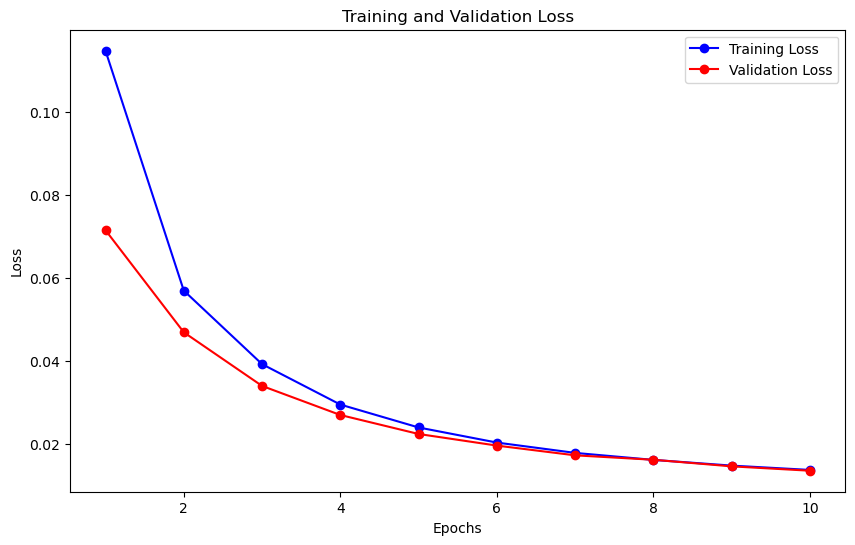

In [57]:
# Extracting loss values
training_loss = base_model.history['loss']
validation_loss = base_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Base model evaluation:
The base model has an accuracy score of  0.9975 which is 99.75%. And from the line graph, it shown that both the training loss and validation loss improves as its value gets lesser throughout the epochs, which indicates that the model's predictions are improving across epochs even towards unseen data, witgh minimal signs of overfitting. This shows an ideal result for a base model with such high accuracy scores. However, further feature engineering as well as cross-validation will be performed to further evaluate that the model's performance towards unseen datasets and also to ensure the model's performance is consistent towards those unseen datasets.

In [62]:
# Generate predictions and show classification report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



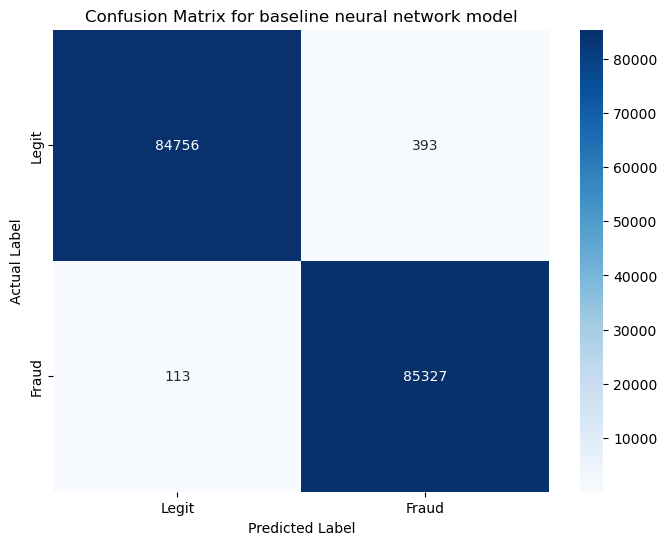

In [64]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for baseline neural network model')
plt.show()

### Confusion matrix evaluation from base model:
From the confusion matrix for the base deep learning model on test set, it has 84781 true negative and 368 false positive by incorrectly detecting those 368 transactions as fradulent when they are legitimate. On other hand, the model correctly detected 85398 true positives but incorrectly detected 42 transactions as legitimate when they are fradulent transactions. Despite the high rate of correctly detecting transactions across both categories, the presense of false negative and false positive highlights the necessity for continuous feature engineering to further improve the model's predictive performance as in the real world, it should aim for almost 100% accuracy to further reduce the risk of any undetected fraudulent transactions.

# Feature engineering

## Building a second iteration deep neural network model after feature engineering of the baseline model

More layers are added into the model architecture, with additional of 2 dropout layers. 

#### Model architecture

To summarize the model layers, the model have a first dense layer of 32 neurons of Rectified Linear UNit(ReLU) activations followed by a dropout layer of 20% dropout rate to prevent overfitting, a 16 neuron Dense layer of ReLU, another dropout layer of 20% dropout rate, with the last dense layer of 1 neuron of sigmoid activation.

In [66]:
# Define the second iteration neural network model
model = tf.keras.models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape explicitly
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Train the model
deep_model = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, base2_acc = model.evaluate(X_test, y_test, verbose=2)
print("Enhanced neural network model's accuracy :", base2_acc)

Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9263 - loss: 0.1825 - val_accuracy: 0.9842 - val_loss: 0.0438
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9828 - loss: 0.0485 - val_accuracy: 0.9940 - val_loss: 0.0214
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9900 - loss: 0.0298 - val_accuracy: 0.9965 - val_loss: 0.0137
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9977 - val_loss: 0.0114
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9947 - loss: 0.0179 - val_accuracy: 0.9983 - val_loss: 0.0090
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9986 - val_loss: 0.0071
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9984 - val_loss: 0.0079
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9961 - loss: 0.0135 - 

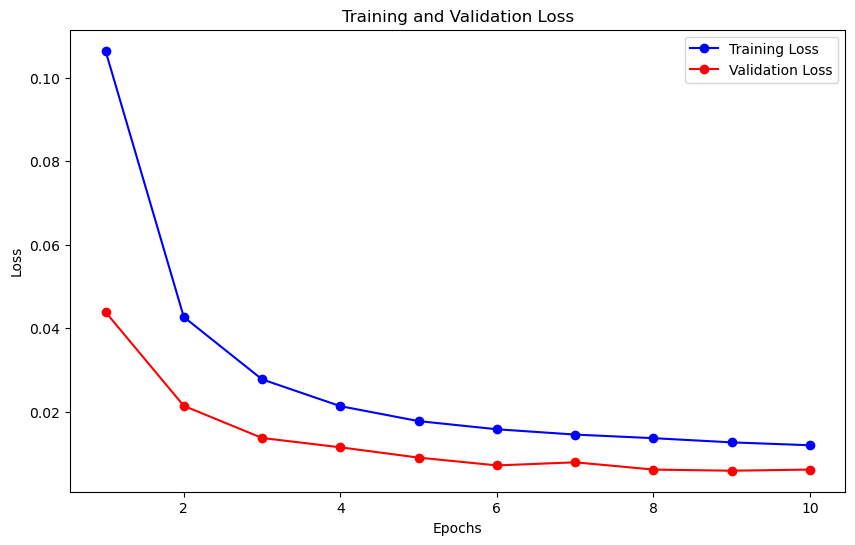

In [70]:
# Extracting loss values
training_loss = deep_model.history['loss']
validation_loss = deep_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


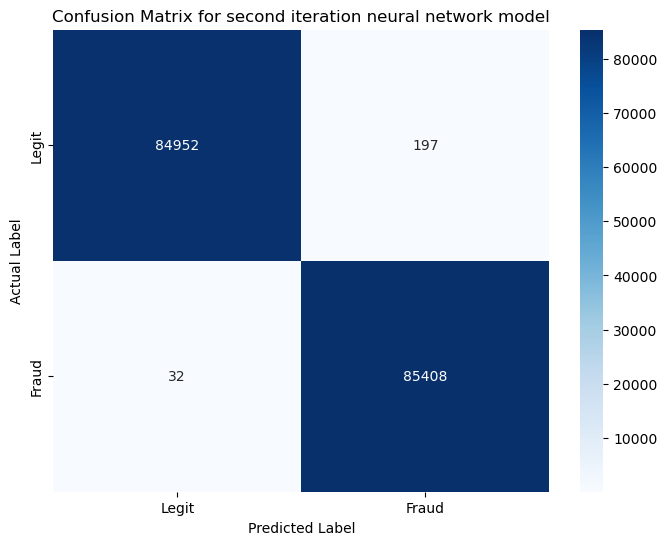

In [72]:
# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for second iteration neural network model')
plt.show()

### Model and confusion matrix evaluation after feature engineering
The second iteration model has an accuracy of 0.9983 which is 99.83% on the test sets.

Training and validation loss both decreases consistently during epochs.

This time the model was able to correctly detect 84930 transactions as true negatives and 85379 transactions as true positives. However the model incorrectly detect 61 transactions as false negatives and 219 transactions as false positive.

The model after feature engineering was able to performed slightly better than the base model(99.83% vs 99.75% of the base model)

# Cross-validation

Using StraitifiedKFold with 4 splits for cross-validation to ensure the second iteration model generalizes and performs well across different subsets of the dataset.

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import StratifiedKFold, cross_val_score

# convert X_train and y_train to NumPy arrays from pandas DataFrames or Series,
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

def create_cross_valid_model():
    model = Sequential([
        Input(shape=(X_train_np.shape[1],)),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare cross-validation
n_splits = 4
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)

scores = []
for train_idx, test_idx in kfold.split(X_train_np, y_train_np):  # Adjusted variable names for clarity
    # Create a new instance of the model for each fold
    model = create_cross_valid_model()
    
    # Fit the model on the training split
    model.fit(X_train_np[train_idx], y_train_np[train_idx], epochs=10, batch_size=128, verbose=1)
    
    # Evaluate the model on the test split
    scores.append(model.evaluate(X_train_np[test_idx], y_train_np[test_idx], verbose=0)[1])  # [1] is for accuracy


# Calculate and print the average accuracy of the model after cross-validation with standard deviation in percentage
print(f"Second iteration model's accuracy after cross-validation: {np.mean(scores) * 100:.2f}% (+/- {np.std(scores) * 100:.2f}%)")

Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9252 - loss: 0.1839
Epoch 2/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9812 - loss: 0.0523
Epoch 3/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0308
Epoch 4/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0236
Epoch 5/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9940 - loss: 0.0196
Epoch 6/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 7/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9956 - loss: 0.0155
Epoch 8/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9960 - loss: 0.0149
Epoch 9/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9962 - loss: 0.0141
Epoch 10/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0131
Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9335 - loss: 0.1684
Epoch 2/10
2333/2333 ━━━━━━━━━━

### Cross validation evaluation:
It resulted in 99.87% accuracy after 4-fold cross validation, which highlights the strengths in the model's predictive performance to unseen data. It also has a slightly better accuracy score than the model after feature engineering which shows that the model is performing better even towards new datasets in identifying and detecting fradulent transactions.

# Feature engineering 2.0

### Building a third iteration deep neural network model
Further adjustment of the model architecture to test for a better predictive performance by the model. 

#### Model architecture

This time , there are 3 total reLU dense layer with more neurons and 3 dropout layers with 1 output sigmoid dense layer.

In [76]:
# Define the third iteration neural network model
model = tf.keras.models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape explicitly
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 80)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,481 (25.32 KB)

 Trainable params: 6,481 (25.32 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Train the model
deep_model = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, base3_acc = model.evaluate(X_test, y_test, verbose=2)
print("Third iteration neural network model's accuracy:", base3_acc)

Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9519 - loss: 0.1285 - val_accuracy: 0.9952 - val_loss: 0.0161
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9987 - val_loss: 0.0054
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9991 - val_loss: 0.0041
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9990 - val_loss: 0.0041
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9982 - loss: 0.0067 -

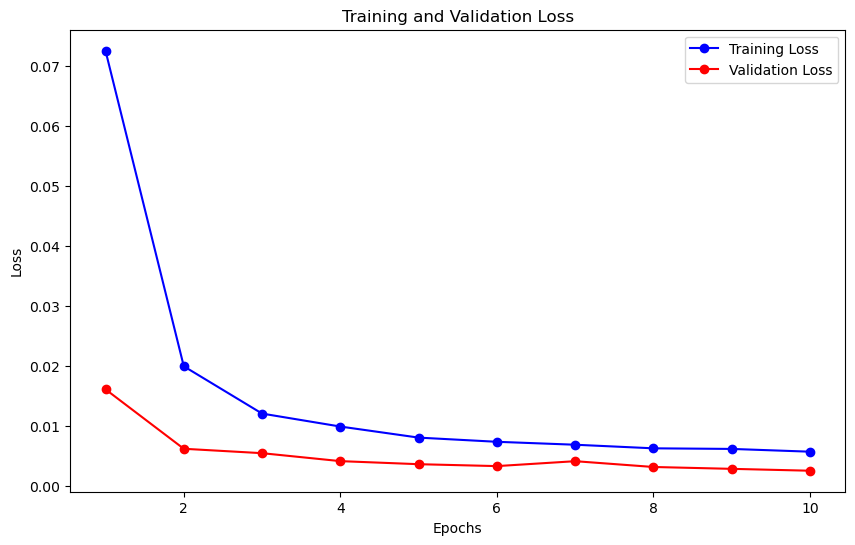

In [80]:
# Extracting loss values
training_loss = deep_model.history['loss']
validation_loss = deep_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


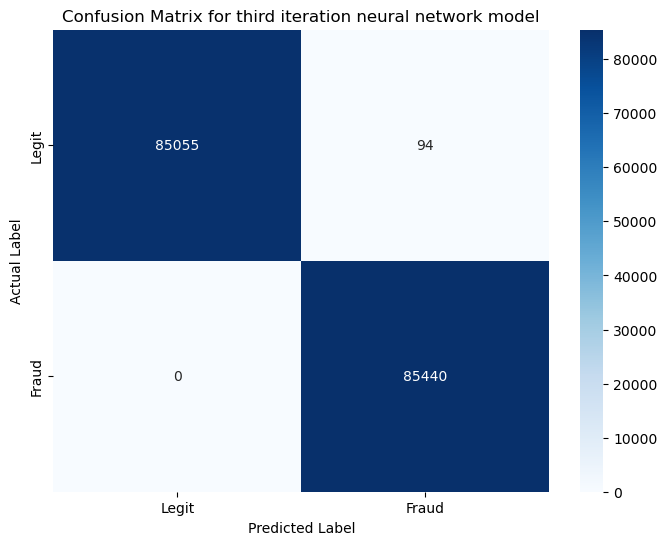

In [82]:
# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for third iteration neural network model')
plt.show()

### Model evaluation after feature engineering 2.0
The third iteration model has an accuracy score of 0.9993 which is 99.93% towards test sets, after applying more and adjusting the hidden layers in the deep learning model. This model also has a slightly better accuracy than the previous models performance.

From the confusion matrix, the model correctly detect 85060(+130) transactions as true negatives and 85423(+44) transactions as true positives as compared to the previous model. The model also incorrectly detect 17(-44) transactions as false negatives and 89(-130) transactions as false positive as compared to the previous model.

This shows that this model has a better overall performance than the previous models.

# Cross validation 2.0

Further cross-validation of the third iteration neural network model was conducted.

In [84]:
# convert X_train and y_train to NumPy arrays from pandas DataFrames or Series,
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

def create_cross_valid_model():
    model = Sequential([
        Input(shape=(X_train_np.shape[1],)),
        Dense(80, activation='relu'),
        Dropout(0.3),
        Dense(40, activation='relu'),
        Dropout(0.2),
        Dense(20, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare cross-validation
n_splits = 4
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)

scores = []
for train_idx, test_idx in kfold.split(X_train_np, y_train_np):  # Adjusted variable names for clarity
    # Create a new instance of the model for each fold
    model = create_cross_valid_model()
    
    # Fit the model on the training split
    model.fit(X_train_np[train_idx], y_train_np[train_idx], epochs=10, batch_size=128, verbose=1)
    
    # Evaluate the model on the test split
    scores.append(model.evaluate(X_train_np[test_idx], y_train_np[test_idx], verbose=0)[1])  # [1] is for accuracy

# Calculate and print the average accuracy of the model after cross-validation with standard deviation in percentage
print(f"Third iteration model's accuracy after cross-validation: {np.mean(scores) * 100:.2f}% (+/- {np.std(scores) * 100:.2f}%)")

Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9521 - loss: 0.1287
Epoch 2/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9923 - loss: 0.0233
Epoch 3/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9961 - loss: 0.0135
Epoch 4/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9969 - loss: 0.0103
Epoch 5/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9977 - loss: 0.0083
Epoch 6/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0077
Epoch 7/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9981 - loss: 0.0069
Epoch 8/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9981 - loss: 0.0072
Epoch 9/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9982 - loss: 0.0067
Epoch 10/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9985 - loss: 0.0056
Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9520 - loss: 0.1314
Epoch 2/10
2333/2333 ━━━━━━━━━━

### Cross-validation evaluation:
After cross-validation, the model has an accuracy score of 99.93% which shows its optimal predictive performance towards unseen dataset.

# Featuring Engineering 3.0 with PReLU

### Building a fourth iteration deep neural network model
Further adjustment in model architecture to test for a better predictive performance by the model. In this iteration, Parametric Rectified Linear Units(PReLU) is implemented as part of feature engineering into the model architecture. This might allows the model to better adapt to improve its model predictive performance.

#### Model architecture

This time , there are 3 total reLU dense layer with more neurons, 3 dropout layers, 1 output sigmoid dense layer in addition to 3 more PReLU layers.

In [86]:
from tensorflow.keras.layers import PReLU

# Define the fourth iteration neural network model with PReLU
model = tf.keras.models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape explicitly
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 80)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 80)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 40)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 20)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,621 (25.86 KB)

 Trainable params: 6,621 (25.86 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Train the model
prelu_model = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, base4_acc = model.evaluate(X_test, y_test, verbose=2)
print("Neural Network with PReLU model's accuracy", base4_acc)

Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9575 - loss: 0.1190 - val_accuracy: 0.9969 - val_loss: 0.0127
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9987 - val_loss: 0.0052
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9991 - val_loss: 0.0040
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9985 - loss: 0.00

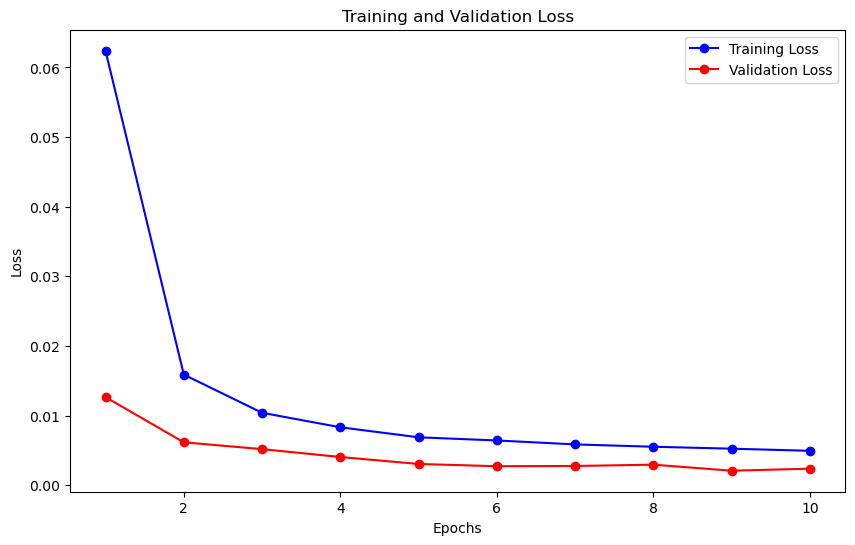

In [90]:
# Extracting loss values
training_loss = prelu_model.history['loss']
validation_loss = prelu_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


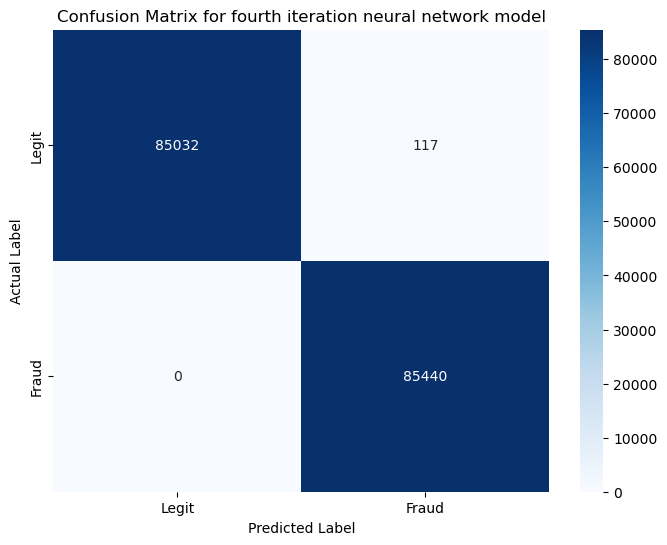

In [92]:
# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for fourth iteration neural network model')
plt.show()

# Cross validation 3.0

Further cross-validation of the tourth iteration neural network model was conducted.

In [94]:
# convert X_train and y_train to NumPy arrays from pandas DataFrames or Series,
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

def create_cross_valid_model():
    model = Sequential([
        Input(shape=(X_train_np.shape[1],)),
        Dense(80, activation='relu'),
        PReLU(),
        Dropout(0.2),
        Dense(40, activation='relu'),
        PReLU(),
        Dropout(0.2),
        Dense(20, activation='relu'), 
        PReLU(),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare cross-validation
n_splits = 4
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)

scores = []
for train_idx, test_idx in kfold.split(X_train_np, y_train_np):  # Adjusted variable names for clarity
    # Create a new instance of the model for each fold
    model = create_cross_valid_model()
    
    # Fit the model on the training split
    model.fit(X_train_np[train_idx], y_train_np[train_idx], epochs=10, batch_size=128, verbose=1)
    
    # Evaluate the model on the test split
    scores.append(model.evaluate(X_train_np[test_idx], y_train_np[test_idx], verbose=0)[1])  # [1] is for accuracy

print(f"Fourth iteration model's accuracy after cross-validation: {np.mean(scores) * 100:.2f}% (+/- {np.std(scores) * 100:.2f}%)")


Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9533 - loss: 0.1216
Epoch 2/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9936 - loss: 0.0198
Epoch 3/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9965 - loss: 0.0119
Epoch 4/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9975 - loss: 0.0089
Epoch 5/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0071
Epoch 6/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9983 - loss: 0.0062
Epoch 7/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9983 - loss: 0.0064
Epoch 8/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9984 - loss: 0.0057
Epoch 9/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9987 - loss: 0.0047
Epoch 10/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9987 - loss: 0.0048
Epoch 1/10
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9508 - loss: 0.1274
Epoch 2/10
2333/2333 ━━━━━━━━

# Building a convolutional neural network model

Convolutional Neural Network(CNN) is generally utilized for data with spatial relationships and especially successful in image and audio processing task. In this case, CNN is implemented to use its primciples to analyze the dataset and leverage their ability to capture patterns in the dataset.

# Model architecture

The CNN model has an input layer, followed by a Conv1D layer which is use to extract patterns from the sequences of data points in the feature and then applies ReLU to introduce non-linearities. Then, a MaxPooling1D layer is added to reduce the dimensionality of the data and to help prevent overfitting. The layers are then flatten by the Flatten layer to turn the 3D output into 1D array to allow the next 2 dense layer to process, one with ReLU and one with sigmoid activation.

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 

# Define the convolutional neural network model
model = Sequential([
     Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=16, kernel_size=10, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 16)         │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,361 (20.94 KB)

 Trainable params: 5,361 (20.94 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Train the model
cnn_model = model.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping],)

# Reshape X_test
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Evaluate the model on the test set
test_loss, cnn_acc = model.evaluate(X_test_cnn, y_test, verbose=2)
print("CNN model's accuracy", cnn_acc)

Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9574 - loss: 0.1254 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9941 - val_loss: 0.0168
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9959 - loss: 0.0154 - val_accuracy: 0.9975 - val_loss: 0.0114
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9972 - loss: 0.0113 - val_accuracy: 0.9982 - val_loss: 0.0081
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9980 - loss: 0.0085 - val_accuracy: 0.9979 - val_loss: 0.0076
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9988 - val_loss: 0.0055
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9987 - loss: 0.

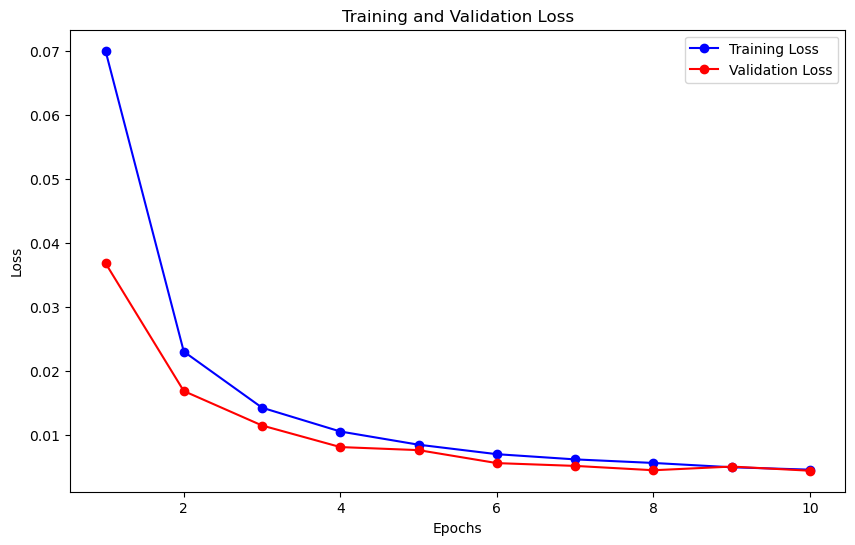

In [100]:
# Extracting loss values
training_loss = cnn_model.history['loss']
validation_loss = cnn_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


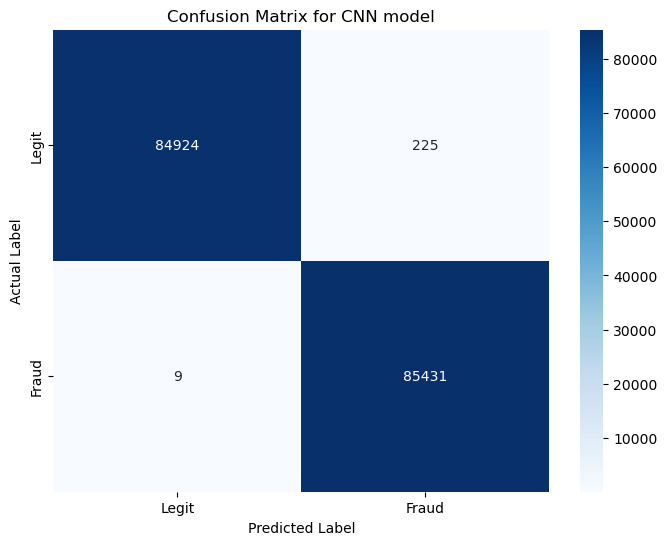

In [102]:
# Generate predictions
y_pred_probs = model.predict(X_test_cnn)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for CNN model')
plt.show()

### CNN Model evaluation:
The CNN model has an accuracy score of 0.9982 which is 99.82%, which is a slightly worse performance when compared to the deep learning model after feature engineering 2.0 of 99.93% accuracy.

From the confusion matrix, the model correctly detect 84518(-542) transactions as true negatives and 85335(-88) transactions as true positives as compared to the deep learning model after feature engineering 2.0. The model also incorrectly detect 105(+88) transactions as false negatives and 631(+542) transactions as false positives. This shows thar the CNN model detected lesser true positives and negatives and detected more false positives and negatives in total

Which shows that the CNN model did not have a better predictive performance than the deep learning model when it comes to detecting credit card fraud transactions.

# Long Short-Term Memory(LSTM) model

Long Short-Term Memeory(LSTM) is a type of recurrent neural network(RNN) suitable for sequence prediction tasks. The architecture of the LSTM model is built to be able to capture temporal dependencies in the dataset.

#### Model architecture

The input data is reshaped to fit the LSTM's requirement format. Then it has the first LSTM layer of 32 units and it returns sequences to pass the output to another LSTM layer. Followed by a dropout layer of 0.2 and then another LSTM layer of 16 units that does not return sequences, followed by a dropout layer and a output dense layer with sigmoid activation.

In [104]:
from tensorflow.keras.layers import LSTM

# Reshape input to be [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) 

# Compile and summary of the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Tom_N\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,089 (43.32 KB)

 Trainable params: 11,089 (43.32 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Train the model
lstm_model = model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, lstm_acc = model.evaluate(X_test_lstm, y_test, verbose=2)
print("LSTM model's accuracy:", lstm_acc)

Epoch 1/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9483 - loss: 0.1470 - val_accuracy: 0.9906 - val_loss: 0.0249
Epoch 2/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9897 - loss: 0.0277 - val_accuracy: 0.9958 - val_loss: 0.0122
Epoch 3/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9937 - loss: 0.0174 - val_accuracy: 0.9974 - val_loss: 0.0084
Epoch 4/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.9986 - val_loss: 0.0061
Epoch 5/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9987 - val_loss: 0.0051
Epoch 6/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 7/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 8/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9980 - loss: 0

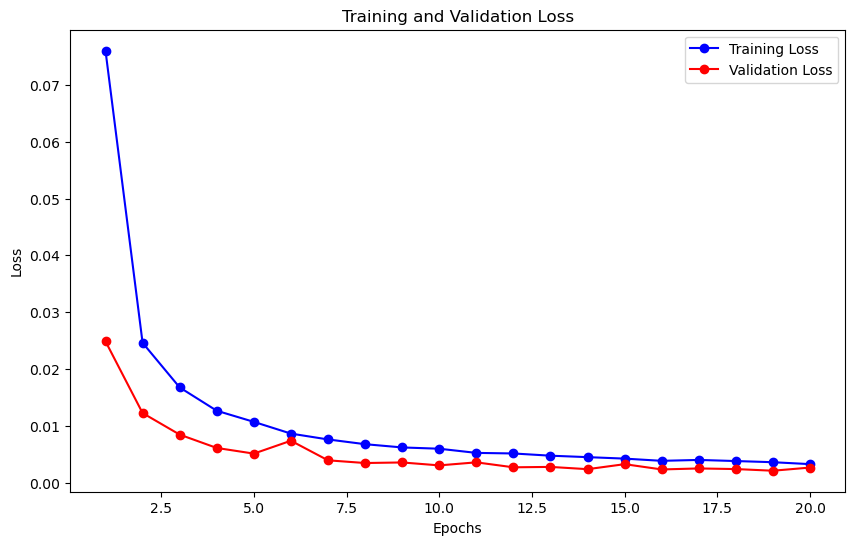

In [108]:
# Extracting loss values
training_loss = lstm_model.history['loss']
validation_loss = lstm_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Results, analysis and visualizations

In [134]:
# All models' names in order
algorithms = ['Naive Bayes', 'Logistic Regression', 'Linear SVM', 
              'Random Forest', 'AdaBoost', 'LightGBM',
              'Base Neural Network', '2nd Iteration NN', '3rd Iteration NN', '4th Iteration NN', 
             'Convolutional Neural Network', 'Long Short-Term Memory'
             ]

# Corresponding accuracies from all models
accuracies = [nb_acc, logreg_acc, svm_acc, rf_acc, ada_acc, lgbm_acc, 
              base_acc, base2_acc, base3_acc, base4_acc, cnn_acc, lstm_acc ]

# Convert accuracies into percentages
accuracies_percentage = [acc * 100 for acc in accuracies]

# Combine algorithm names and accuracies
data = list(zip(algorithms, accuracies_percentage))

# Sort data based on accuracies (highest to lowest)
data.sort(key=lambda x: x[1], reverse=True)

# Unzip sorted data
algorithms, accuracies_percentage = zip(*data)


# Define model categories
ml_models = ['Naive Bayes', 'Logistic Regression', 'Linear SVM', 'Random Forest', 'AdaBoost', 'LightGBM']
dl_models = ['Base Neural Network', '2nd Iteration NN', '3rd Iteration NN', '4th Iteration NN', 
             'Convolutional Neural Network', 'Long Short-Term Memory']

# Separate accuracies into ML and DL
ml_data = [item for item in data if item[0] in ml_models]
dl_data = [item for item in data if item[0] in dl_models]

# Unzip data
ml_algorithms, ml_accuracies_percentage = zip(*ml_data)
dl_algorithms, dl_accuracies_percentage = zip(*dl_data)

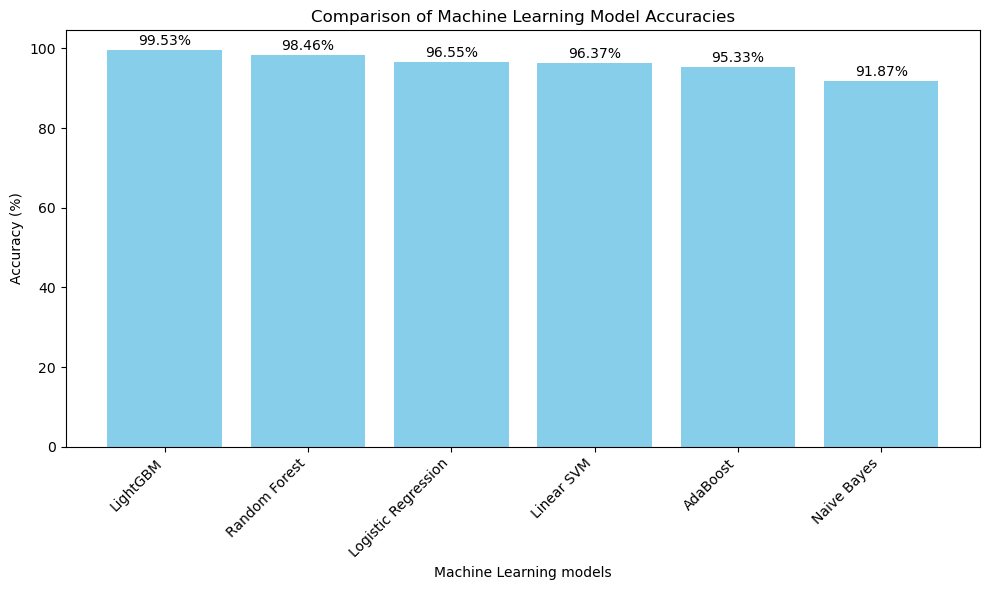

In [136]:

plt.figure(figsize=(10, 6))
ml_bars = plt.bar(ml_algorithms, ml_accuracies_percentage, color='skyblue')

for bar, acc in zip(ml_bars, ml_accuracies_percentage):
    y_pos = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos + 0.5, f'{acc:.2f}%',  # Adjust y position slightly above the bar
             ha='center', va='bottom', color='black')

plt.xlabel('Machine Learning models')
plt.ylabel('Accuracy (%)')
plt.title("Comparison of Machine Learning Model Accuracies")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(ml_accuracies_percentage) + 5) 
plt.tight_layout()
plt.show()


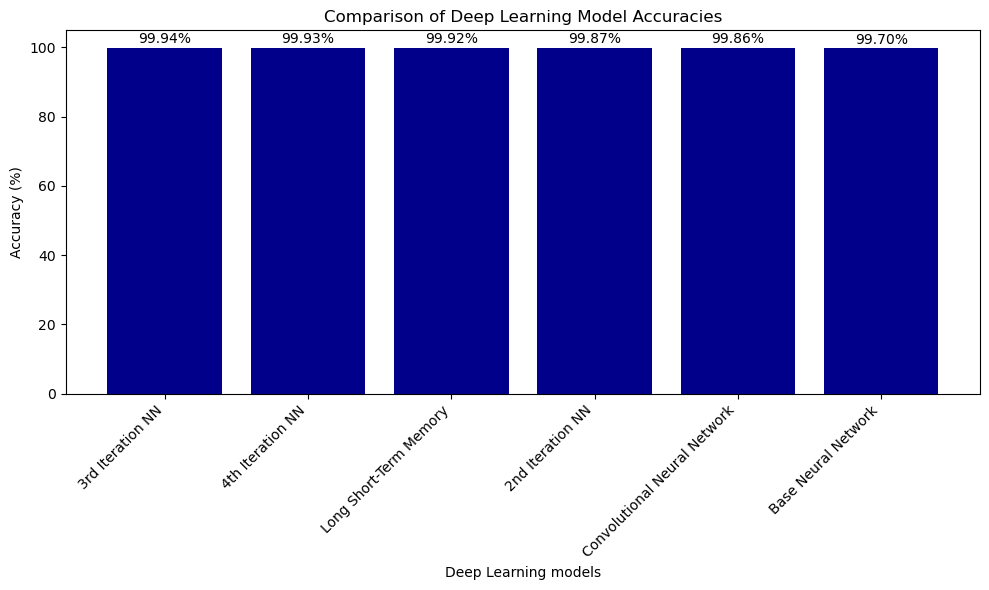

In [138]:
plt.figure(figsize=(10, 6))
dl_bars = plt.bar(dl_algorithms, dl_accuracies_percentage, color='darkblue')

# Adjust text placement for clarity
for bar, acc in zip(dl_bars, dl_accuracies_percentage):
    y_pos = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos + 0.5, f'{acc:.2f}%',
             ha='center', va='bottom', color='black')

plt.xlabel('Deep Learning models')
plt.ylabel('Accuracy (%)')
plt.title("Comparison of Deep Learning Model Accuracies")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(dl_accuracies_percentage) + 5) 
plt.tight_layout()
plt.show()

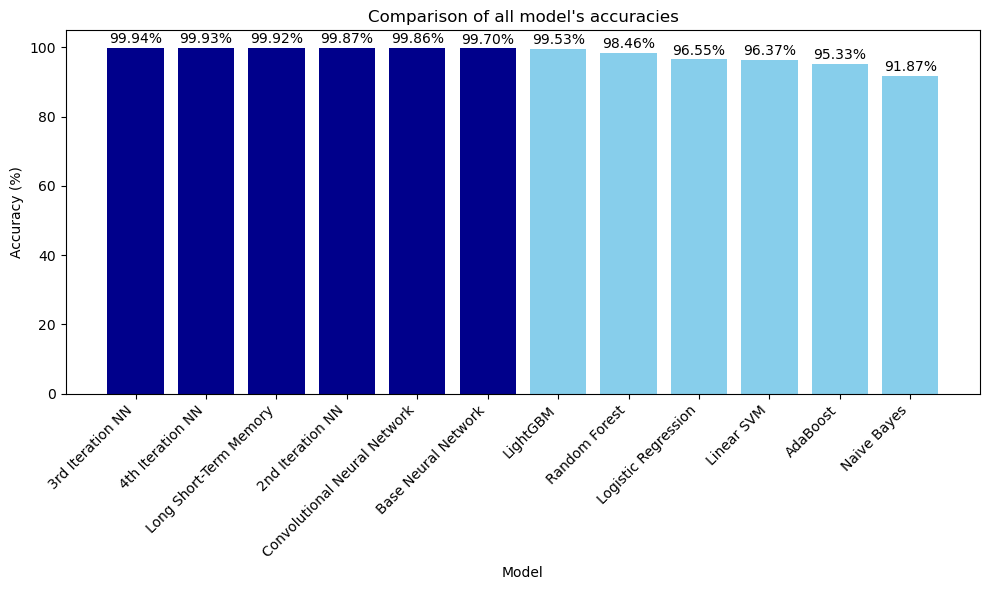

In [151]:
colors = ['skyblue' if alg in ml_models else 'darkblue' for alg in algorithms]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies_percentage, color = colors)

for bar, acc in zip(bars, accuracies_percentage):
    y_pos = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos + 0.5, f'{acc:.2f}%', 
             ha='center', va='bottom', color='black')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title("Comparison of all model's accuracies")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis based on accuracy

#### Machine Learning Models

LightGBM is the top performer with an accuracy of 99.53% due to its effieciency in handling large data sets with large number of features. LightGBM also uses gradient-based boosting and tree-base learning algorithms which is optimized to get high accuracy with a lesser computational demand. 

Random Forest came in second best with an accuracy of 98.46% followed by Logistic Regression of 96.55% and Linear SVM of 96.37%. On the other hand, AdaBoost and Naive Bayes showed lower performance as compared to other machine learning models with an accuracy of 95.33% and 91.87% respectively. Which might be due to the model being sensitive to outliers in the case of AdaBoost and the linear nature of Linear SVM may struggle with non-linear decision boundaries.

#### Deep Learning Models

The 3rd Iteration Neural Network model which has 3 total reLU dense layer with more neurons and 3 dropout layers with 1 output sigmoid dense layer achieved the highest accuracy of 99.94%. The 4th Iteraiton NN was only 0.01% accuracy away, it has an accuracy of 99.93% and it utilizes PReLU activations in its model architecture. LSTM model came in third with an accuracy of 99.92% which shows that its able to capture long-term dependencies. Followed by 2nd Iteration NN and CNN model and lastly the base NN model with an accuracy of 99.87%, 99.86% and 99.70% respectively. This followed a positive trend of the baseline model having the least accuracies and its performanced improve after iterations of feature engineering.

#### Overall

Among all the models, all deep learning models outperformed machine learning models as they were likely able to capture more complex patterns and relationships in the data through multiple layers and non-linear transformations.

## Conclusion
From the final year project, I have used a methodical approach to improving my models in fraud detection through the iterative refinement of the deep learning models. The progression from a baseline model through multiple iterations of feature engineering have resulted in the best model with an accuracy of 99.94% and enhanced by cross-validations.

In conclusion, in domains as sensitive as fraud detection, even the smallest improvements can have significant impacts. Among the different models implemented, the 3rd Iteration model just slightly edged out in the 4th Iteration model which uses PReLU advanced activations, and they also outperformed Convolutional Neural Network(CNNs). The slight underperformances of the CNN model highlights the importance of choosing the right and best model as any undetected fraud transaction can bring it significant loss to the financial institutions and the loss in consumer's trust. 

This project was able to achieve a high degree of accuracy in fraud detection. However, I have to take into considerations that in this domain of fraud detection, the dataset I used are balanced while in practice, credit card transaction datasets are significantly unbalanced, with legitimate transactions overwhelmingly outnumbering fraudulent ones. The balanced dataset used in this project allowed for a controlled environment to develop and test deep learning models for fraud detection. However, translating these models into the real-world context of significantly unbalanced data requires careful consideration of class imbalance and its effects on model training and performance evaluation.

Going forward, it is important to adapt these models to handle unbalanced data as well. By incorporating techniques such as Synthetic Minority Over-Sampling Technique(SMOTE), cost-sensitive learning or anamoly detection to help mitigate the effects of class imbalance. This will ensure that the models are able to improve on their precision and recall besides achieving high accuracy, making it ideal for practical application of credit card fraud detection. The next steps for future takeovers or further improvement of the project would be to focus on addressing the complexities of real-world data as mentioned, being able to handle and achieve the same results with imbalanced dataset instead.